In [12]:
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

import seaborn as sns

In [2]:
df = pd.read_csv('netflix_titles_nov_2019_cleaned_3_yearmonth.csv', encoding='cp1252')

In [4]:
df['Year'].min()

2008

In [6]:
# earliest year added is 2008
# therefore filter for only films released from 2008 onwards
released2008 = df[df['release_year'] >= 2008]

released2008.head()

,show_id,title,director,cast,country,date_added,filled_date,release_year,rating,duration,listed_in,description,type,Year_Month,Year,Month
0,81193313,Chocolate,unknown,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,30/11/2019 00:00,43799,2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show,2019-11,2019,11
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,unknown,30/11/2019 00:00,43799,2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,2019-11,2019,11
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,30/11/2019 00:00,43799,2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,2019-11,2019,11
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium",29/11/2019 00:00,43798,2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,2019-11,2019,11
4,80213643,Chip and Potato,unknown,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,43798,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show,2019-11,2019,11


In [7]:
# calculate difference between release year and year added
released2008['yr_diff'] = released2008['Year'] - released2008['release_year']

released2008.head()

C:\Users\NM2.DHU65ATF\AppData\Local\Temp\ipykernel_22560\3188164802.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  released2008['yr_diff'] = released2008['Year'] - released2008['release_year']


,show_id,title,director,cast,country,date_added,filled_date,release_year,rating,duration,listed_in,description,type,Year_Month,Year,Month,yr_diff
0,81193313,Chocolate,unknown,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,30/11/2019 00:00,43799,2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show,2019-11,2019,11,0
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,unknown,30/11/2019 00:00,43799,2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,2019-11,2019,11,0
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,30/11/2019 00:00,43799,2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,2019-11,2019,11,0
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium",29/11/2019 00:00,43798,2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,2019-11,2019,11,0
4,80213643,Chip and Potato,unknown,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,43798,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show,2019-11,2019,11,0


In [8]:
released2008['yr_diff'].describe()

count    5210.000000
mean        1.914971
std         2.591809
min        -3.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        11.000000
Name: yr_diff, dtype: float64

In [9]:
# ignore cases where year added < release year, as assume this is erroneous
released2008_filter = released2008[released2008['yr_diff'] >= 0]

In [10]:
released2008_filter['yr_diff'].describe()

count    5201.000000
mean        1.920592
std         2.590374
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        11.000000
Name: yr_diff, dtype: float64

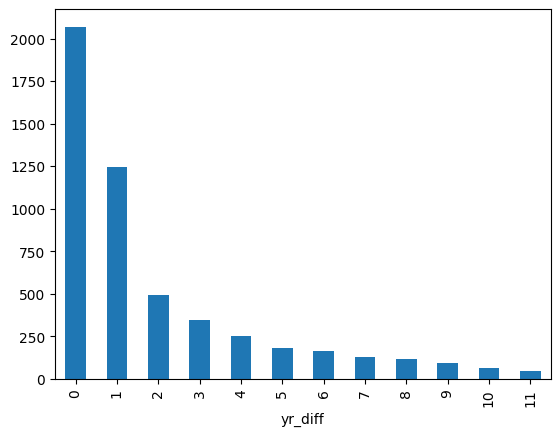

In [11]:
# count of titles by difference between year added and released
title_by_yr_diff = released2008_filter.groupby('yr_diff')['title'].count()

plt.figure()
title_by_yr_diff.plot.bar()

plt.show();

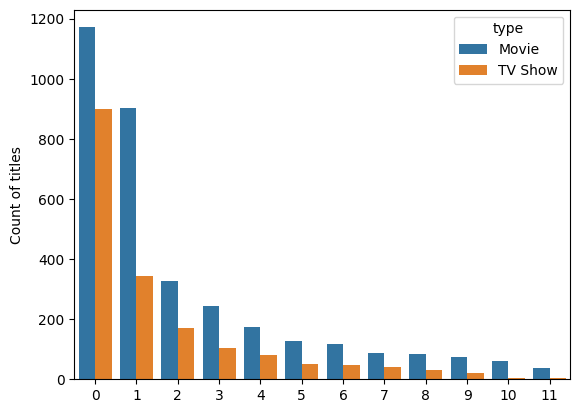

In [13]:
# count of titles by year difference and type
title_by_yr_diff_type = released2008_filter.groupby(['type', 'yr_diff'])['title'].count().reset_index()

plt.figure()
sns.barplot(data = title_by_yr_diff_type, 
            x = 'yr_diff', 
            y = 'title', 
            hue = 'type')
plt.ylabel('Count of titles')
plt.xlabel(None)

plt.show();

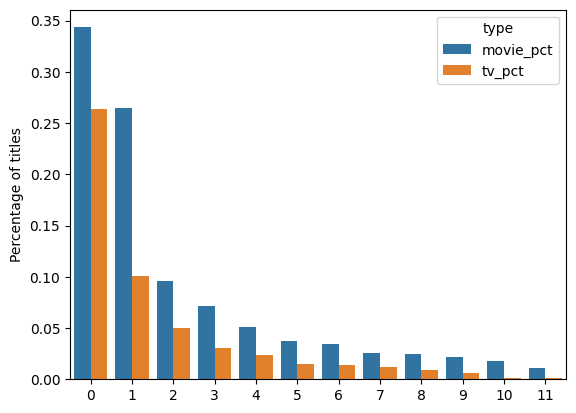

In [29]:
# percentage of titles released by year difference and type
title_by_yr_diff_type_wide = title_by_yr_diff_type.pivot_table(
    index = 'yr_diff', 
    columns = 'type', 
    values = 'title'
)

movie_total = title_by_yr_diff_type_wide['Movie'].sum()

tv_total = title_by_yr_diff_type_wide['TV Show'].sum()

title_by_yr_diff_type_wide['movie_pct'] = title_by_yr_diff_type_wide['Movie'] / movie_total

title_by_yr_diff_type_wide['tv_pct'] = title_by_yr_diff_type_wide['TV Show'] / movie_total

title_by_yr_diff_type_long = pd.melt(title_by_yr_diff_type_wide.reset_index(), id_vars = 'yr_diff', value_vars = ['movie_pct', 'tv_pct'])

plt.figure()
sns.barplot(data = title_by_yr_diff_type_long, 
            x = 'yr_diff', 
            y = 'value', 
            hue = 'type')
plt.ylabel('Percentage of titles')
plt.xlabel(None)

plt.show();